# Consultas
En este cuadernose resumen las consultas del enunciado de la etapa 1, empleando en este caso la clase BiciMad. Tal como se planteaba en el enunciado inicialmente, se trabajará únicamente con los datos correspondientes a Febrero de 2023. 

In [1]:
import matplotlib.pyplot as plt

from EMT.objects import BiciMad

bici_mad_instance = BiciMad(
    year=23,
    month=2
)

Previamente a la resolución de las consultas, se aplica la limpieza de los datos, de modo que se trabaje con datos consistentes sin presencia de NaN.

In [2]:
bici_mad_instance.clean()

## C1
¿Cuántas bicicletas han sido desbloqueadas de una estación y no se bloquean en ninguna?

In [3]:
f1 = bici_mad_instance.data.locktype == 'STATION'
f2 = bici_mad_instance.data.unlocktype != 'STATION'

bici_mad_instance.data[f1 & f2].count()


idBike                 72
fleet                  72
trip_minutes           72
geolocation_unlock     72
address_unlock         72
unlock_date            72
locktype               72
unlocktype             72
geolocation_lock       72
address_lock           72
lock_date              72
station_unlock         72
unlock_station_name     0
station_lock           72
lock_station_name      72
dtype: int64

## C2

Seleccionar solo las bicicletas del tipo de flota '1' . El nuevo dataframe se ha de llamar `regular_fleet`.

In [8]:
regular_fleet = bici_mad_instance.data[
    bici_mad_instance.data['fleet'] == "1.0"]

regular_fleet.head()

,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,unlock_date,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,unlock_station_name,station_lock,lock_station_name
fecha,,,,,,,,,,,,,,,
2023-02-01,7337.0,1.0,5.52,"{'type': 'Point', 'coordinates': [-3.6956178, ...",'Calle Jesús nº 1',2023-02-01T00:00:10,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7088337, ...",'Plaza de la Cebada nº 16 ',2023-02-01T00:05:41,31.0,27 - Huertas,43.0,39 - Plaza de la Cebada
2023-02-01,5098.0,1.0,0.32,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',2023-02-01T00:00:25,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',2023-02-01T00:00:44,52.0,48 - Embajadores 2,52.0,48 - Embajadores 2
2023-02-01,6519.0,1.0,0.27,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',2023-02-01T00:00:36,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',2023-02-01T00:00:52,69.0,65 - Antonio Maura,69.0,65 - Antonio Maura
2023-02-01,2551.0,1.0,8.58,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',2023-02-01T00:00:53,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6991147, ...",'Calle Atocha nº 54',2023-02-01T00:09:28,52.0,48 - Embajadores 2,45.0,41 - Antón Martín
2023-02-01,6519.0,1.0,0.20,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',2023-02-01T00:00:57,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',2023-02-01T00:01:09,69.0,65 - Antonio Maura,69.0,65 - Antonio Maura


## C3
Crea una función llamada `day_time` para calcular las horas totales de uso de bicicletas por día del mes.
La función recibe un dataframe y devuelve una Serie donde el índice es la fecha y el valor es el número de horas.

Prueba la función anterior con el dataframe  `usos`.

__Opcional:__ Dibuja un diagrama de barras con el resultado de la función `day_time` sobre el dataframe `usos`. Utiliza el módulo `matplotlib.pyplot`.

Text(0.5, 1.0, 'Horas de uso por fecha')

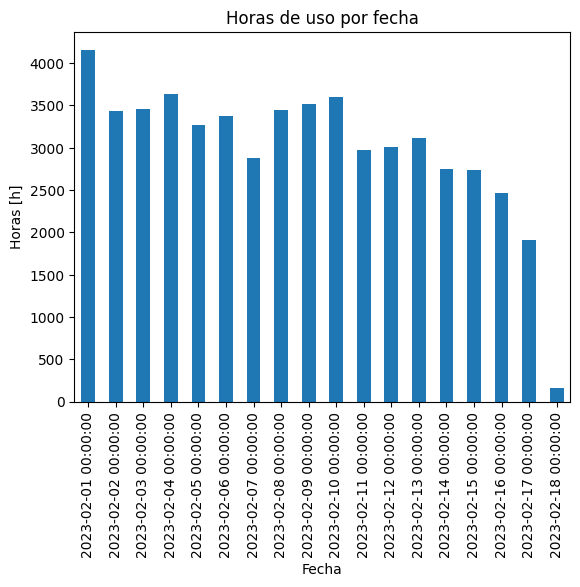

In [11]:
day_time_serie = bici_mad_instance.day_time()

day_time_serie.plot(kind='bar')

plt.xlabel('Fecha')
plt.ylabel('Horas [h]')
plt.title('Horas de uso por fecha')

## C4
Crea una función llamada `weekday_time` para calcular las horas totales de uso de bicicletas por día de la semana. La función recibe un dataframe y devuelve una Serie donde el índice es el día de la semana (L, M, X, J, V, S, D) y el valor es el número de horas.

Prueba la función anterior con el dataframe usos.

Text(0.5, 1.0, 'Horas de uso por dia de semana')

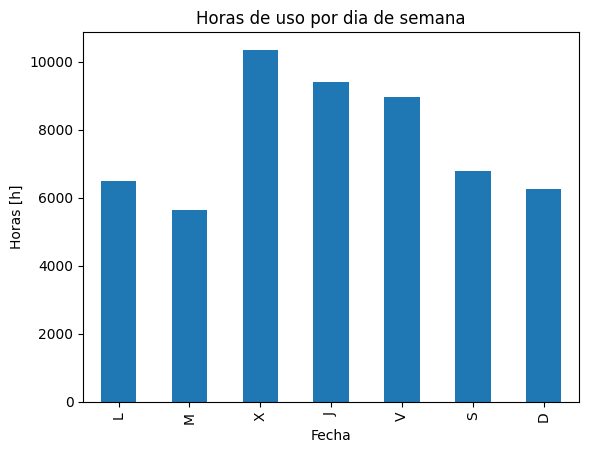

In [14]:
weekday_time_serie = bici_mad_instance.weekday_time().reindex(
    bici_mad_instance.DAYS)

weekday_time_serie.plot(kind='bar')

plt.xlabel('Fecha')
plt.ylabel('Horas [h]')
plt.title('Horas de uso por dia de semana')

## C5
Crea una función llamada `total_usage_day` para calcular el número total de usos de bicicletas por día del mes. La función recibe un dataframe y devuelve una Serie donde el índice es la fecha y el valor es el número de usos.

Prueba la función anterior con el dataframe usos.

In [15]:
bici_mad_instance.total_usage_day()

fecha
2023-02-01    11442
2023-02-02    11069
2023-02-03    10166
2023-02-04     8903
2023-02-05     8026
2023-02-06    10118
2023-02-07     8986
2023-02-08    10576
2023-02-09    10814
2023-02-10    10579
2023-02-11     8383
2023-02-12     7801
2023-02-13     9802
2023-02-14    10341
2023-02-15    10766
2023-02-16     9684
2023-02-17    10067
2023-02-18      971
dtype: int64

## C6
Calcular el total de usos por fecha y estación de desbloqueo. Como la fecha está en el índice y la estación de desbloqueo es una columna, lo mejor es agrupar por la columna `station_unlock` y  un objeto `Grouper` de frecuencia diaria (1D).

A continuación, se muestra un ejemplo del funcionamiento de la función Grouper de pandas:
```
>>> df
             ID  Price
2000-01-02   0     10
2000-01-02   1     20
2000-01-09   2     30
2000-01-16   3     40

# Grouper con frecuencia semanal (1W)
>>> df.groupby(pd.Grouper(freq="1W")).mean()
               ID  Price

2000-01-02    0.5   15.0
2000-01-09    2.0   30.0
2000-01-16    3.0   40.0
```

In [3]:
bici_mad_instance.weekly_group()

fecha       station_unlock
2023-02-01  1.0               31
            10.0              33
            100.0             31
            101.0             23
            102.0             57
                              ..
2023-02-18  95.0               3
            96.0               1
            97.0               2
            99.0               1
            nan                2
Length: 4581, dtype: int64

## C7
Se quiere averiguar la dirección de las estaciones de desbloqueo que a lo largo del mes han tenido un mayor número de viajes. Crear una función llamada `most_popular_stations` que calcule dicho dato. El argumento de la función es un dataframe y devuelve un conjunto con la dirección de las estaciones.


In [4]:
summary = bici_mad_instance.resume()

summary['most_popular_station']

["'Plaza de la Cebada nº 16 '"]

## C8

Se quiere averiguar el  número de usos de las estaciones de desbloqueo que a lo largo del mes ha tenido un mayor número de viajes. Crear una función llamada `usage_from_most_popular_station` que calcule dicho dato. El argumento de la función es un dataframe y devuelve un entero.

In [6]:
summary['uses_from_most_popular']

2245

In [7]:
bici_mad_instance.data['address_unlock'].value_counts().max()

2189

In [8]:
print(summary)

year                                               2023
month                                                 2
total_uses                                       168494
total_time                                      53890.1
most_popular_station      ['Plaza de la Cebada nº 16 ']
uses_from_most_popular                             2245
dtype: object


In [13]:
bici_mad_instance.data['address_unlock']

fecha
2023-02-01                'Calle Jesús nº 1'
2023-02-01    'Glorieta de Embajadores nº 2'
2023-02-01       'Calle Antonio Maura nº 15'
2023-02-01    'Glorieta de Embajadores nº 2'
2023-02-01       'Calle Antonio Maura nº 15'
                           ...              
2023-02-18          'Calle Jacometrezo nº 3'
2023-02-18          'Calle Jacometrezo nº 3'
2023-02-18    'Calle Doctor Esquerdo nº 191'
2023-02-18               'Calle Sodio nº 1B'
2023-02-18                   'Plaza Cibeles'
Name: address_unlock, Length: 168494, dtype: object

In [29]:
f1 = bici_mad_instance.data.address_unlock == "'Plaza de la Cebada nº 16 '"



TypeError: can only concatenate str (not "int") to str